In [1]:
import pandas as pd
import numpy as np

fifa = pd.read_csv(r'../data/FIFA.csv',encoding='euc-kr')
fifa.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355


1. FIFA 데이터에서 각 선수의 키는 Height변수에 피트로 인치로 입력되어 있습니다. 이를 cm로 변환하여 새로운 변수 Height_cm을 생성하시오.
("'" 앞의 숫자는 피트이며, "'" 뒤의 숫자는 인치, 1피트 = 30cm, 1인치 = 2.5cm)

In [2]:
def createcm(x):
    x_list = x.split("'")
    cm = int(x_list[0]) * 30 + int(x_list[1]) * 2.5
    return cm

In [3]:
fifa['Height_cm'] = fifa['Height'].apply(createcm)
fifa.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,167.5
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,185.0
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,172.5
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,190.0
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,177.5


2. 포지션을 의미하는 Position 변수를 아래표를 참고하여 'Fowrward', 'Midfielder', 'Defender', 'GoalKeeper'로 재범주화하고, factor형으로 변환하여 Position_Class라는 변수를 생성하시오.

In [4]:
p_dict = { 'Forward' : ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW'],
          'MidFielder' : ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM'],
          'Defender': ['LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'],
          'GoalKeeper' :['GK']}

In [6]:
def get_key(x):
    for key, value in p_dict.items():
        if x in value:
            y = key
            return y

In [7]:
fifa['Position_class'] = fifa['Position'].apply(get_key)
fifa.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm,Position_class
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,167.5,Forward
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,185.0,Forward
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,172.5,Forward
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,190.0,GoalKeeper
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,177.5,MidFielder


3. 새로 생성한 Position_Class 변수의 각 범주에 따른 Value 변수 평균값의 차이를 비교하는 일원배치 분산분석을 수행하고 결과를 해석하시오.(데이터는 등분산성 가정을 만족한다고 가정) 그리고 평균값의 차이가 통계적으로 유의하다면 사후검정을 수행하고 설명하시오.

In [8]:
import scipy.stats as stats
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

fifa.Position_class.value_counts()

Defender      6763
MidFielder    4935
Forward       3044
GoalKeeper    1900
Name: Position_class, dtype: int64

In [9]:
fifa['Position_class'].unique()

array(['Forward', 'GoalKeeper', 'MidFielder', 'Defender'], dtype=object)

In [10]:
# 포지션별 변수 할당
position_list = fifa['Position_class'].unique()

forward = fifa[fifa['Position_class'] == position_list[0]]['Value']
goalkeeper = fifa[fifa['Position_class'] == position_list[1]]['Value']
midfielder = fifa[fifa['Position_class'] == position_list[2]]['Value']
defender = fifa[fifa['Position_class'] == position_list[3]]['Value']

세 변수의 데이터가 충분히 크기 때문에 정규성을 만족한다고 판단

- 귀무가설 : 4가지 포지션에 대해 Value의 평균은 같다.
- 대립가설 : 적어도 하나의 포지션에 대한 Value의 평균값에는 차이가 있다.

In [12]:
stats.f_oneway(forward, goalkeeper, midfielder, defender)

F_onewayResult(statistic=41.87390580849466, pvalue=5.988667429906719e-27)

p-value가 0.05보다 작기 때문에 유의수준 5%에서 귀무가설을 기각한다. 즉 적어도 하나의 포지션의 Value 평균값에는 차이가 존재한다고 판단한다.

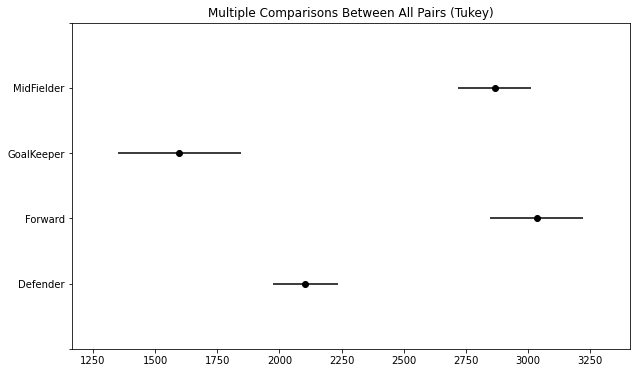

In [13]:
mc = MultiComparison(data = fifa['Value'], groups=fifa['Position_class'])
tuekeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tuekeyhsd.plot_simultaneous()

In [14]:
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Defender,Forward,930.373,0.0,610.7412,1250.0048,True
Defender,GoalKeeper,-507.3848,0.0034,-887.6281,-127.1415,True
Defender,MidFielder,760.8787,0.0,486.7109,1035.0465,True
Forward,GoalKeeper,-1437.7579,0.0,-1865.9257,-1009.59,True
Forward,MidFielder,-169.4944,0.5691,-507.0009,168.0122,False
GoalKeeper,MidFielder,1268.2635,0.0,872.8761,1663.6509,True


Forward와 Midfielder를 제외한 모든 변수간에 차이가 있다고 판단했다. 즉, 거의 모든 변수들에 차이가 존재한다고 판단한다.

4. Preferred Foot(주로 사용하는 발)과 Position_class에 따라 Value의 차이가 있는지를 알아보기 위해 이원배치분산분석을 수행하고 결과를 해석하시오.

- 귀무가설1 : Preferred Foot과 Position_class 변수의 상호작용 효과가 없다.
- 귀무가설2 : Preferred Foot에 따른 종속변수의 값에는 차이가 없다.
- 귀무가설3 : Position_Class에 따른 종속변수의 값에는 차이가 없다.
- 대립가설1 : Preferred Foot과 Position_Class 변수의 상호작용 효과가 있다.
- 대립가설2 : Preferred Foot에 따른 종속변수의 값에는 차이가 있다.
- 대립가설3 : Position_Class에 따른 종속변수의 값에는 차이가 있다.

In [16]:
anova_data = fifa[['Position_class', 'Preferred_Foot', 'Value']]
anova_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16642 entries, 0 to 16641
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Position_class  16642 non-null  object
 1   Preferred_Foot  16642 non-null  object
 2   Value           16642 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 390.2+ KB


In [17]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'Value ~ C(Preferred_Foot) + C(Position_class) + C(Preferred_Foot) : C(Position_class)'
model = ols(formula, anova_data).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Preferred_Foot),1.522715e+08,1.0,4.691332,3.032930e-02
C(Position_class),4.087367e+09,3.0,41.975902,5.151392e-27
C(Preferred_Foot):C(Position_class),4.736156e+08,3.0,4.863874,2.207249e-03
Residual,5.399071e+11,16634.0,NaN,NaN


- Preferred_Foot 변수의 종속변수에 미치는 영향을 검정한 결과, p-value가 0.05보다 작으므로 귀무가설을 기각한다. 따라서 Preferred_Foot에 따른 Value 차이가 존재한다고 판단
- Position_class 변수의 종속변수에 미치는 영향을 검정한 결과, p-value가 0.05보다 작으므로 귀무가설을 기각한다. 따라서 Position_class에 따른 Value 차이가 존재한다고 판단
- 두 변수의 교호작용에 대해 검정한 결과 p-value가 0.05보다 작으므로 귀무가설을 기각한다. 따라서 두 변수에서 교호작용이 존재한다는 것을 알 수 있다.